**Prática de Segmentação de imagens**

In [23]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

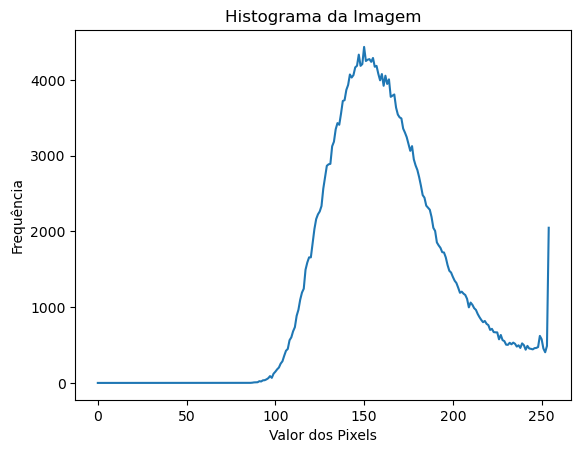

In [17]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

histImg = cv2.calcHist([img1], [0], None, [255], [0, 256])

# Exiba o histograma
plt.plot(histImg)
plt.title('Histograma da Imagem')
plt.xlabel('Valor dos Pixels')
plt.ylabel('Frequência')
plt.show()

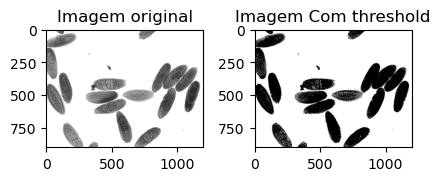

In [21]:
thresold = 200
_, img_threshold = cv2.threshold(img1, thresold , 255, cv2.THRESH_BINARY)

plt.subplot(131)
plt.imshow(img1, cmap='gray')
plt.title('Imagem original')

plt.subplot(132)
plt.imshow(cv2.cvtColor(img_threshold, cv2.COLOR_BGR2RGB))
plt.title('Imagem Com threshold')

plt.tight_layout()
plt.show()

2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

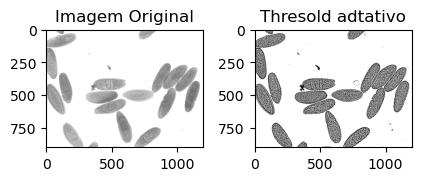

In [36]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

thresh = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,, 2)


plt.subplot(131)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')

plt.subplot(132)
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)
plt.title('Thresold adtativo')

plt.tight_layout()



Valor Thresold:  170.5


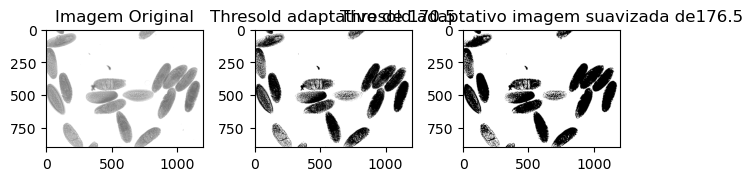

In [92]:
def estimateInitialValues(img): 
    media = (int(img.max()) + int(img.min())) / 2

    diference = True
    while diference:
        g1 = img[img <= media]
        g2 = img[img > media]
        media_g1 = (int(g1.max()) + int(g1.min())) / 2
        media_g2 = (int(g2.max()) + int(g2.min())) / 2
        new_media = (media_g1+media_g2)/2

        if media - new_media<=1 and media-new_media>=0:
            diference = False
        media=new_media
    return media

media = estimateInitialValues(img1)
_, imgHistBinary = cv2.threshold(img1, media, 255, cv2.THRESH_BINARY)
img_suavizada = cv2.GaussianBlur(img1, [5,5], 0)
media_imgSuavizada = estimateInitialValues(img_suavizada)
_, imgHistBinarySuavizada = cv2.threshold(img_suavizada, media_imgSuavizada, 255, cv2.THRESH_BINARY)
print("Valor Thresold: ", media )

plt.subplot(131)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')

plt.subplot(132)
plt.imshow(imgHistBinary, cmap='gray', vmin=0, vmax=255)
plt.title('Thresold adaptativo de ' +str(media))

plt.subplot(133)
plt.imshow(imgHistBinarySuavizada, cmap='gray', vmin=0, vmax=255)
plt.title('Thresold adaptativo imagem suavizada de' +str(media_imgSuavizada))

plt.tight_layout()

plt.show()



3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

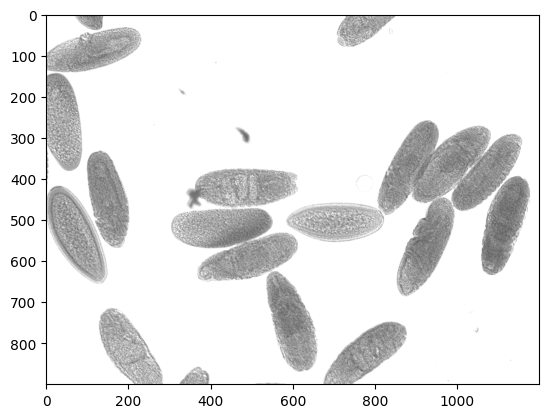

In [6]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

In [ ]:
4)	Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)

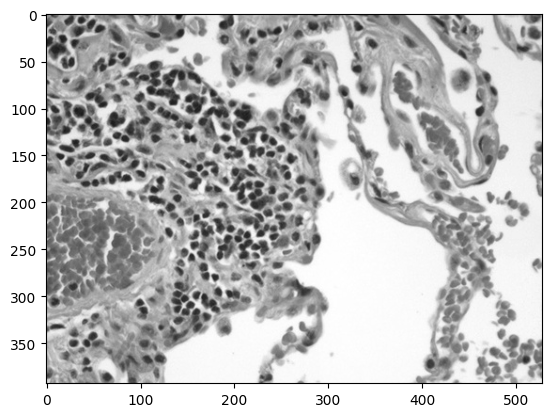

In [7]:
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);